In [24]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

# Ejercicio 4

## Ejercicio 4.a

La funcion de densidad viene dada por:

\begin{equation} f_{X}(x) = 
\left\{
  \begin{aligned}
    0 &\, & \mbox{si } \ x \leq 1 \\
    \frac{1}{9}(x - 1) &\, & \mbox{si } \ 1 < x \leq 2 \\
    \frac{1}{9} &\, & \mbox{si } \ 2 < x \leq 5 \\
    \frac{2}{45}\,x&-\frac{1}{9}& \mbox{si } \ 5 < x \leq 7 \\
    \frac{-1}{15}\,x&+\frac{10}{15}& \mbox{si } \ 7 < x \leq 10 \\
    0 &\, & \mbox{si } \ x \geq 10 \\
  \end{aligned}
  \right.
\end{equation}

la cual es una funcion de densidad, ya que la integral bajo su curva:

$\int_{-\infty}^{\infty} f_{X}(x) \,dx =
 \frac{1}{9}.\frac{1}{2} + 3.\frac{1}{9} +(\frac{1}{9} + \frac{1}{5}).\frac{2}{2} + \frac{1}{5}.\frac{3}{2} = 1$

## Ejercicio 4.b
La funcion de distribucion de $X$ viene dada por:

$F_{X}(x) = \int_{-\infty}^{x} f_{X}(x) \,dx $

Realizando las operaciones pertinentes, obtuvimos:

\begin{equation}F_{X}(x)= 
\left\{
  \begin{aligned}
    0 &\, & \mbox{si } \ x \leq 1 \\
    \frac{(x-1)^{2}}{18} &\, & \mbox{si } \ 1 < x \leq 2 \\
    \frac{1}{18}+\frac{1}{9}(x-2) &\, & \mbox{si } \ 2 < x \leq 5 \\
    \frac{7}{18}+\frac{(x-5)x}{45}&& \mbox{si } \ 5 < x \leq 7 \\
    \frac{-(x-10)^{2}}{30}+1&& \mbox{si } \ 7 < x \leq 10 \\
    1 &\, & \mbox{si } \ x \geq 10 \\
  \end{aligned}
  \right.
\end{equation}


In [25]:
def F(x):
  if(x <= 1): 
    return 0
  if(x <= 2): 
    return ((x-1)**2)/18
  if(x <= 5): 
      return (1/18+1/9*(x-2))
  if(x <= 7): 
      return (7/18 +(x-5)*x/45)
  if(x <= 10): 
      return -((x-10)**2/30)+1
  else: return 1

x = np.arange(0., 11, 0.08)

y = []
for i in range(len(x)):
   y.append(F(x[i]))

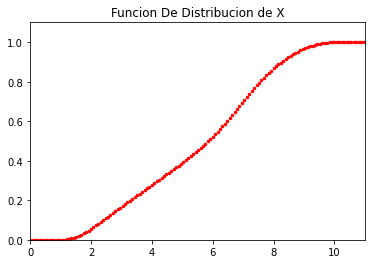

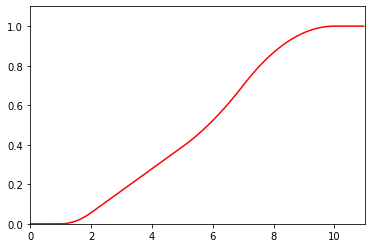

In [26]:
plt.title('Funcion De Distribucion de X')
plt.plot(x,y,c='red', ls='', ms=5, marker='.')
ax = plt.gca()
ax.set_ylim([0, 1.1])
ax.set_xlim([0, 11])

plt.show()

plt.plot(x,y,c='red')
ax = plt.gca()
ax.set_ylim([0, 1.1])
ax.set_xlim([0, 11])

plt.show()


Calculamos la inversa de la funcion de distribucion de $X$:  $F^{-1}_{X}(x)$ definida en el intervalo [0;1]
con imagen [1;10] donde la funcion es estrictamente creciente:



Realizando las operaciones pertinentes(considerando las rama de las cuadraticas que se corresponden con
la concavidad de la funcion en los determinados trozos y pasando las ecuaciones a su forma canonica
para un mejor manejo de los calculos), obtuvimos:

\begin{equation}F^{-1}_{X}(x)=
\left\{
  \begin{aligned}
    1 + \sqrt{18 x}  &\, & \mbox{si } \ 0 < x \leq \frac{1}{18} \\
    9 (x - \frac{1}{18}) + 2 &\, & \mbox{si } \ \frac{1}{18} < x \leq \frac{7}{18} \\
    \sqrt{45(x-\frac{1}{4})} + \frac{5}{2} &\, & \mbox{si } \ \frac{7}{18} < x \leq \frac{7}{10} \\
    10 - \sqrt{30(1- x)} && \mbox{si } \ \frac{7}{10} < x \leq 1 \\
  \end{aligned}
  \right.
\end{equation}

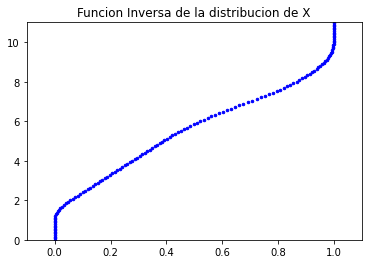

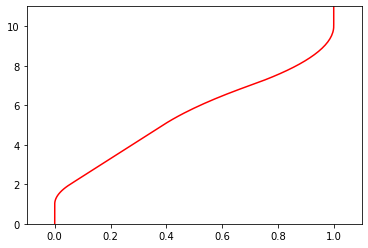

In [27]:
plt.title('Funcion Inversa de la distribucion de X')
plt.plot(y,x,c='blue', ls='', ms=5, marker='.')
ax = plt.gca()
ax.set_ylim([0, 11])
ax.set_xlim([-0.1, 1.1])

plt.show()

plt.plot(y,x,c='blue')
ax = plt.gca()
ax.set_ylim([0, 11])
ax.set_xlim([-0.1, 1.1])

plt.show()


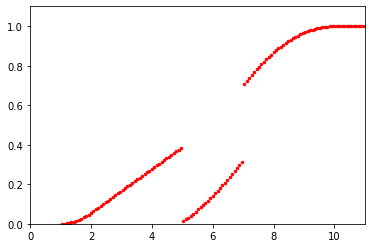

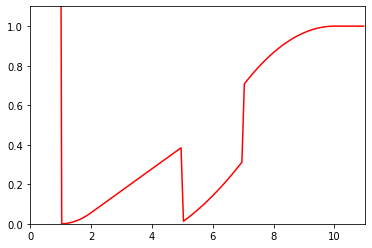

In [24]:
plt.plot(x,y,c='red', ls='', ms=5, marker='.')
ax = plt.gca()
ax.set_ylim([0, 1.1])
ax.set_xlim([0, 11])

plt.show()

plt.plot(x,y,c='red')
ax = plt.gca()
ax.set_ylim([0, 1.1])
ax.set_xlim([0, 11])

plt.show()